In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns

%matplotlib inline

In [25]:
data = pd.read_csv("data/citywide-payroll-data-fiscal-year.csv")
data.sample(10)

/Users/sw/.venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
1436877,2014,DEPT OF ED PER SESSION TEACHER,WILDERS,PATRICIA,M,1993-02-01T00:00:00,NaN,TEACHER- PER SESSION ...,ACTIVE,33.18,per Day,0.0,388.05,0.00,0.00,0.00
642243,2015,BOARD OF ELECTION POLL WORKERS,PEREZ,LYDIA,NaN,2010-01-01T00:00:00,MANHATTAN,ELECTION WORKER ...,ACTIVE,1.00,per Hour,0.0,275.00,0.00,0.00,0.00
236519,2016,DEPT OF ED PARA PROFESSIONALS,MALDONADO,BETZAIDA,NaN,2015-09-09T00:00:00,MANHATTAN,ANNUAL ED PARA ...,ACTIVE,23614.00,per Annum,0.0,20071.74,0.00,0.00,0.00
994283,2015,DEPT OF ED PER SESSION TEACHER,ROMAIN,RUTH,S,2004-09-07T00:00:00,MANHATTAN,TEACHER- PER SESSION ...,ACTIVE,33.18,per Day,0.0,13128.27,0.00,0.00,4.67
940552,2015,DEPT OF ED PER SESSION TEACHER,CZAR,TRACEY,A,2004-09-07T00:00:00,MANHATTAN,TEACHER- PER SESSION ...,ACTIVE,33.18,per Day,0.0,13.06,0.00,0.00,0.00
1152715,2014,ADMIN FOR CHILDREN'S SVCS,SILAS,MARION,S,2011-07-04T00:00:00,NaN,CLERICAL ASSOCIATE MOST MAYORAL AG ...,ACTIVE,41822.00,per Annum,1776.0,40584.51,57.25,1341.96,3925.83
1844901,2017,DEPT OF ED PEDAGOGICAL,BORRERO,RAQUEL,NaN,2004-09-07T00:00:00,MANHATTAN,TEACHER ...,ACTIVE,82995.00,per Annum,0.0,79985.12,0.00,0.00,0.00
856035,2015,DEPT OF ED PEDAGOGICAL,MARUSKA,LAURA,B,2005-09-19T00:00:00,MANHATTAN,TEACHER ...,ACTIVE,73460.00,per Annum,0.0,72598.20,0.00,0.00,0.00
995259,2015,DEPT OF ED PER SESSION TEACHER,ROTONDI,D,M,1995-09-05T00:00:00,MANHATTAN,SCHOOL SECRETARY PER SESSION ...,ACTIVE,20.45,per Day,0.0,18232.98,0.00,0.00,0.00
1400706,2014,DEPT OF ED HRLY SUPPORT STAFF,COOPER,JAMIE,NaN,2010-02-01T00:00:00,NaN,STUDENT AIDE ...,ACTIVE,7.25,per Hour,0.0,84.68,0.00,0.00,0.00


In [26]:
data = data.drop(['Last Name','First Name'], axis=1)
data['Total Pay'] = data['Base Salary'] + data['Regular Gross Paid'] + data['Total OT Paid']

<Figure size 576x360 with 0 Axes>

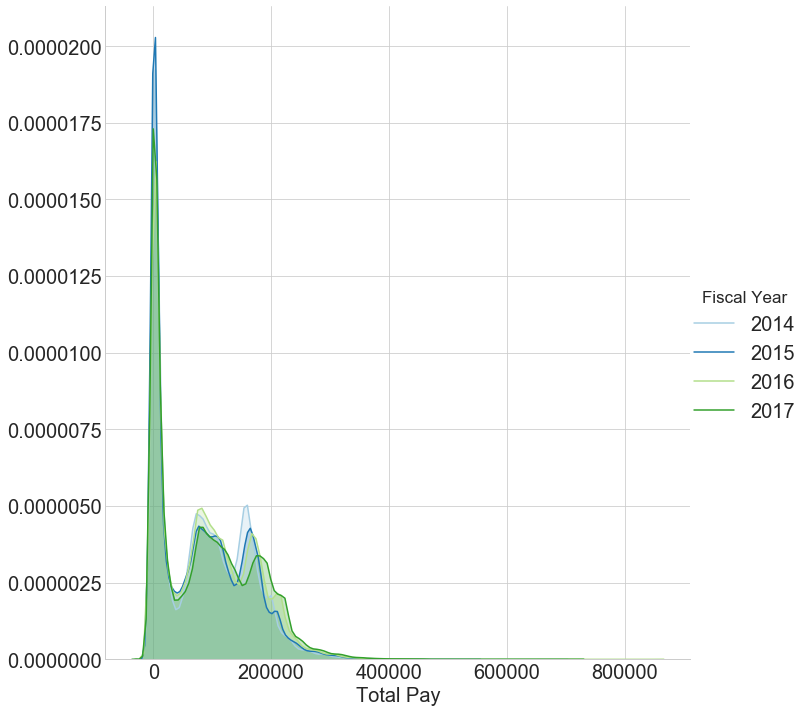

In [115]:
data['Fiscal Year'] = data['Fiscal Year'].astype(str)
plt.figure(figsize=(8,5))
g = sns.FacetGrid(data, hue='Fiscal Year', size=10, hue_order=['2014',
                                                              '2015',
                                                              '2016','2017'], palette="Paired")
g.map(sns.kdeplot, "Total Pay", shade=True)
g.add_legend()

In [27]:
data['Pay Basis'].unique()

array([' per Annum', ' per Hour', ' per Day', ' Prorated Annual',
       'per Annum', 'per Day', 'per Hour', 'Prorated Annual'],
      dtype=object)

In [28]:
data_per_annum = data[data['Pay Basis'].isin([' per Annum',
                                           ' Prorated Annual',
                                           'per Annum','Prorated Annual'])].drop('Pay Basis',
                                                                                axis=1)
data_per_hour = data[data['Pay Basis'].isin([' per Hour',
                                           'per Hour'])].drop('Pay Basis', axis=1)
data_per_day = data[data['Pay Basis'].isin([' per Day',
                                           'per Day'])].drop('Pay Basis', axis=1)

print ("Per Annum Basis --> ",data_per_annum.shape,
       "\nPer Day Basis -- >", data_per_day.shape,
       "\nPer Hour Basis -- >", data_per_hour.shape)

Per Annum Basis -->  (1318029, 14) 
Per Day Basis -- > (465035, 14) 
Per Hour Basis -- > (411424, 14)


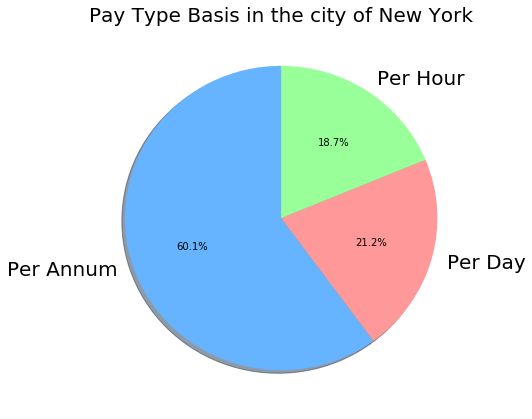

In [54]:
dist_pay_type = [data_per_annum.shape[0], data_per_day.shape[0], data_per_hour.shape[0]]
plt.figure(figsize=(7,7))
plt.pie(dist_pay_type, labels=['Per Annum','Per Day','Per Hour'],
                  autopct='%1.1f%%', shadow=True, startangle=90,
             colors=['#66b3ff','#ff9999','#99ff99'])
plt.title("Pay Type Basis in the city of New York")
plt.show()

In [73]:
def plot_high_low_pay(col, count, pay_basis):
    
    if (pay_basis=='Annum'):
        highest_paying_annum = data_per_annum.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_annum = data_per_annum.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20,25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), data=highest_paying_annum, 
                      orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), data=lowest_paying_annum, 
                      orient='h', ax=ax[1])
        plt.show()
    elif (pay_basis == 'Day'):
        highest_paying_day = data_per_day.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_day = data_per_day.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20, 25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=highest_paying_day, orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=lowest_paying_day, orient='h', ax=ax[1])
        plt.show()
    elif (pay_basis=='Hour'):
        highest_paying_hour = data_per_hour.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_hour = data_per_hour.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20, 25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=highest_paying_hour, orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=lowest_paying_hour, orient='h', ax=ax[1])
        plt.show()

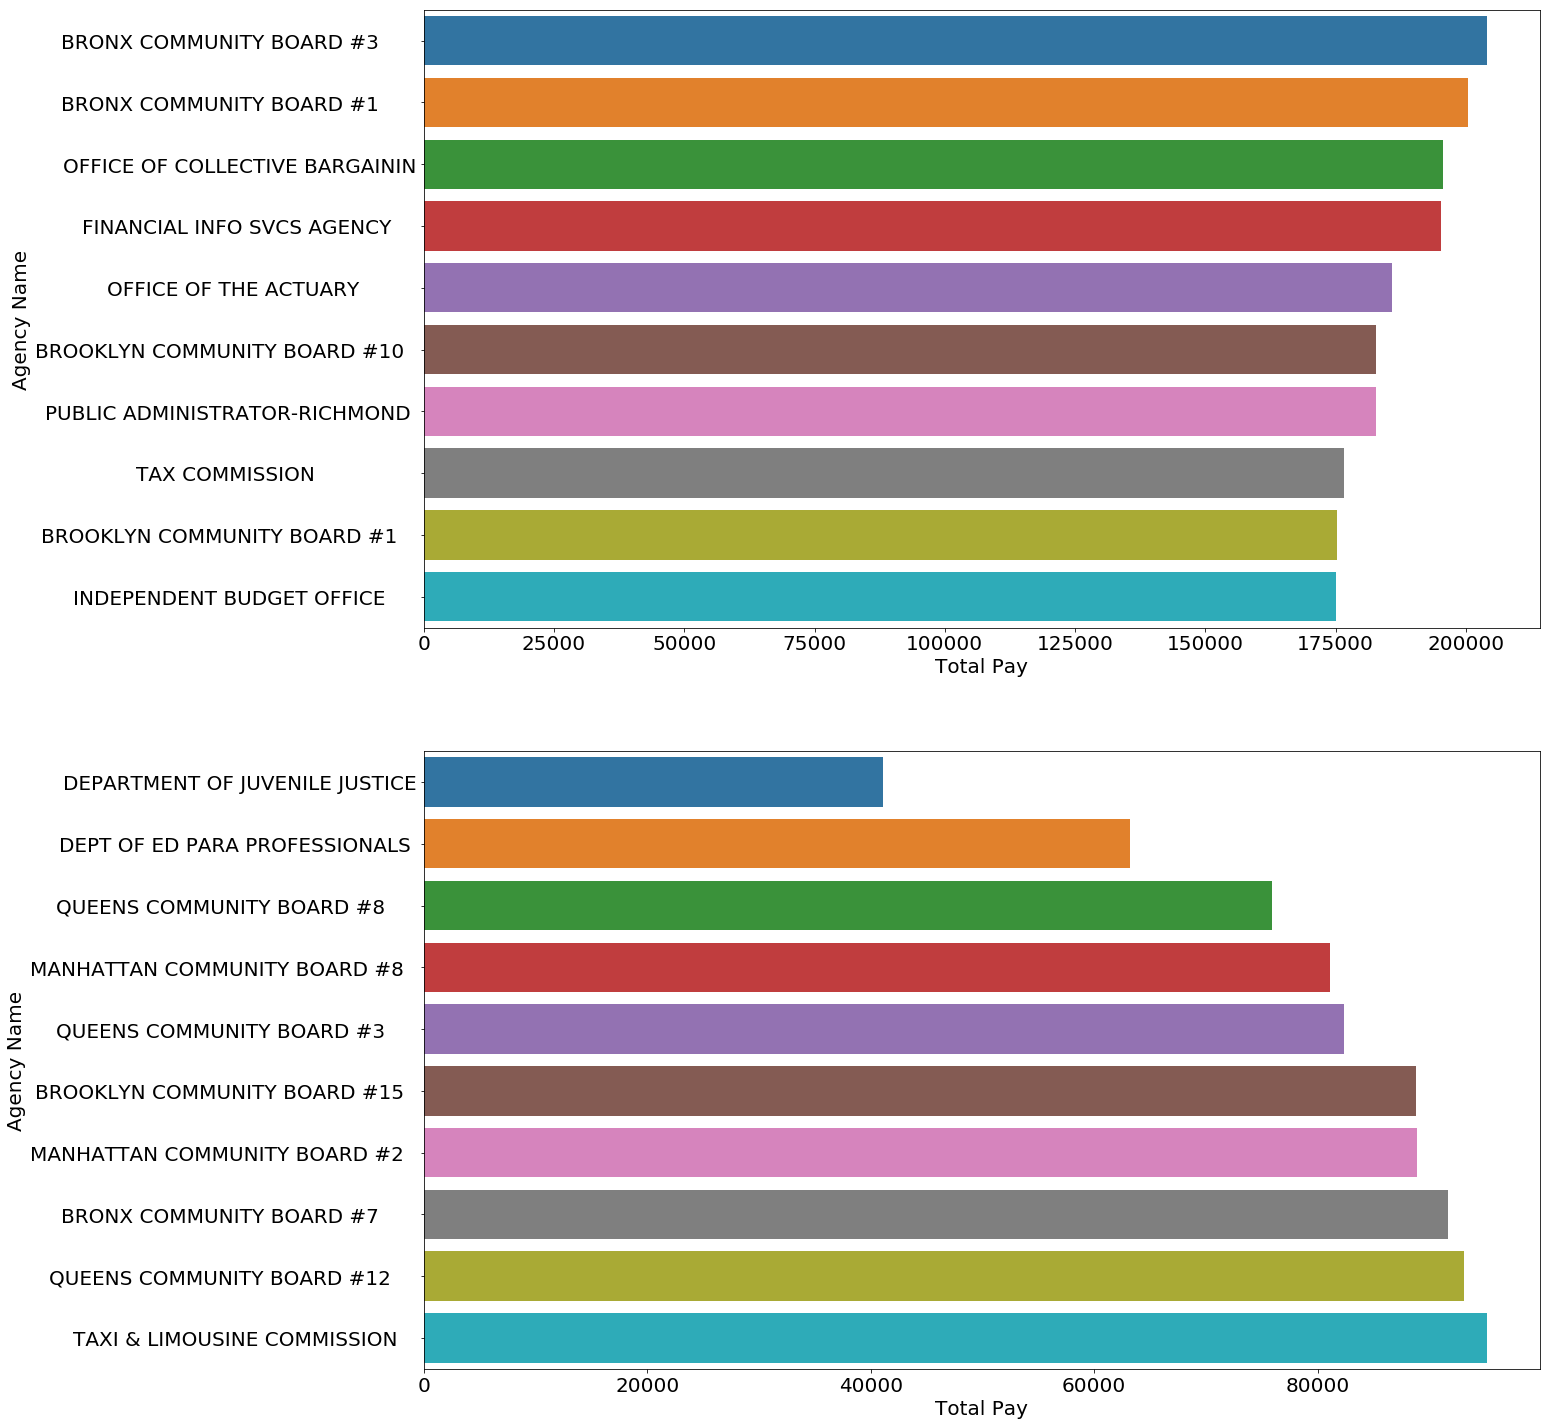

In [70]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Annum')

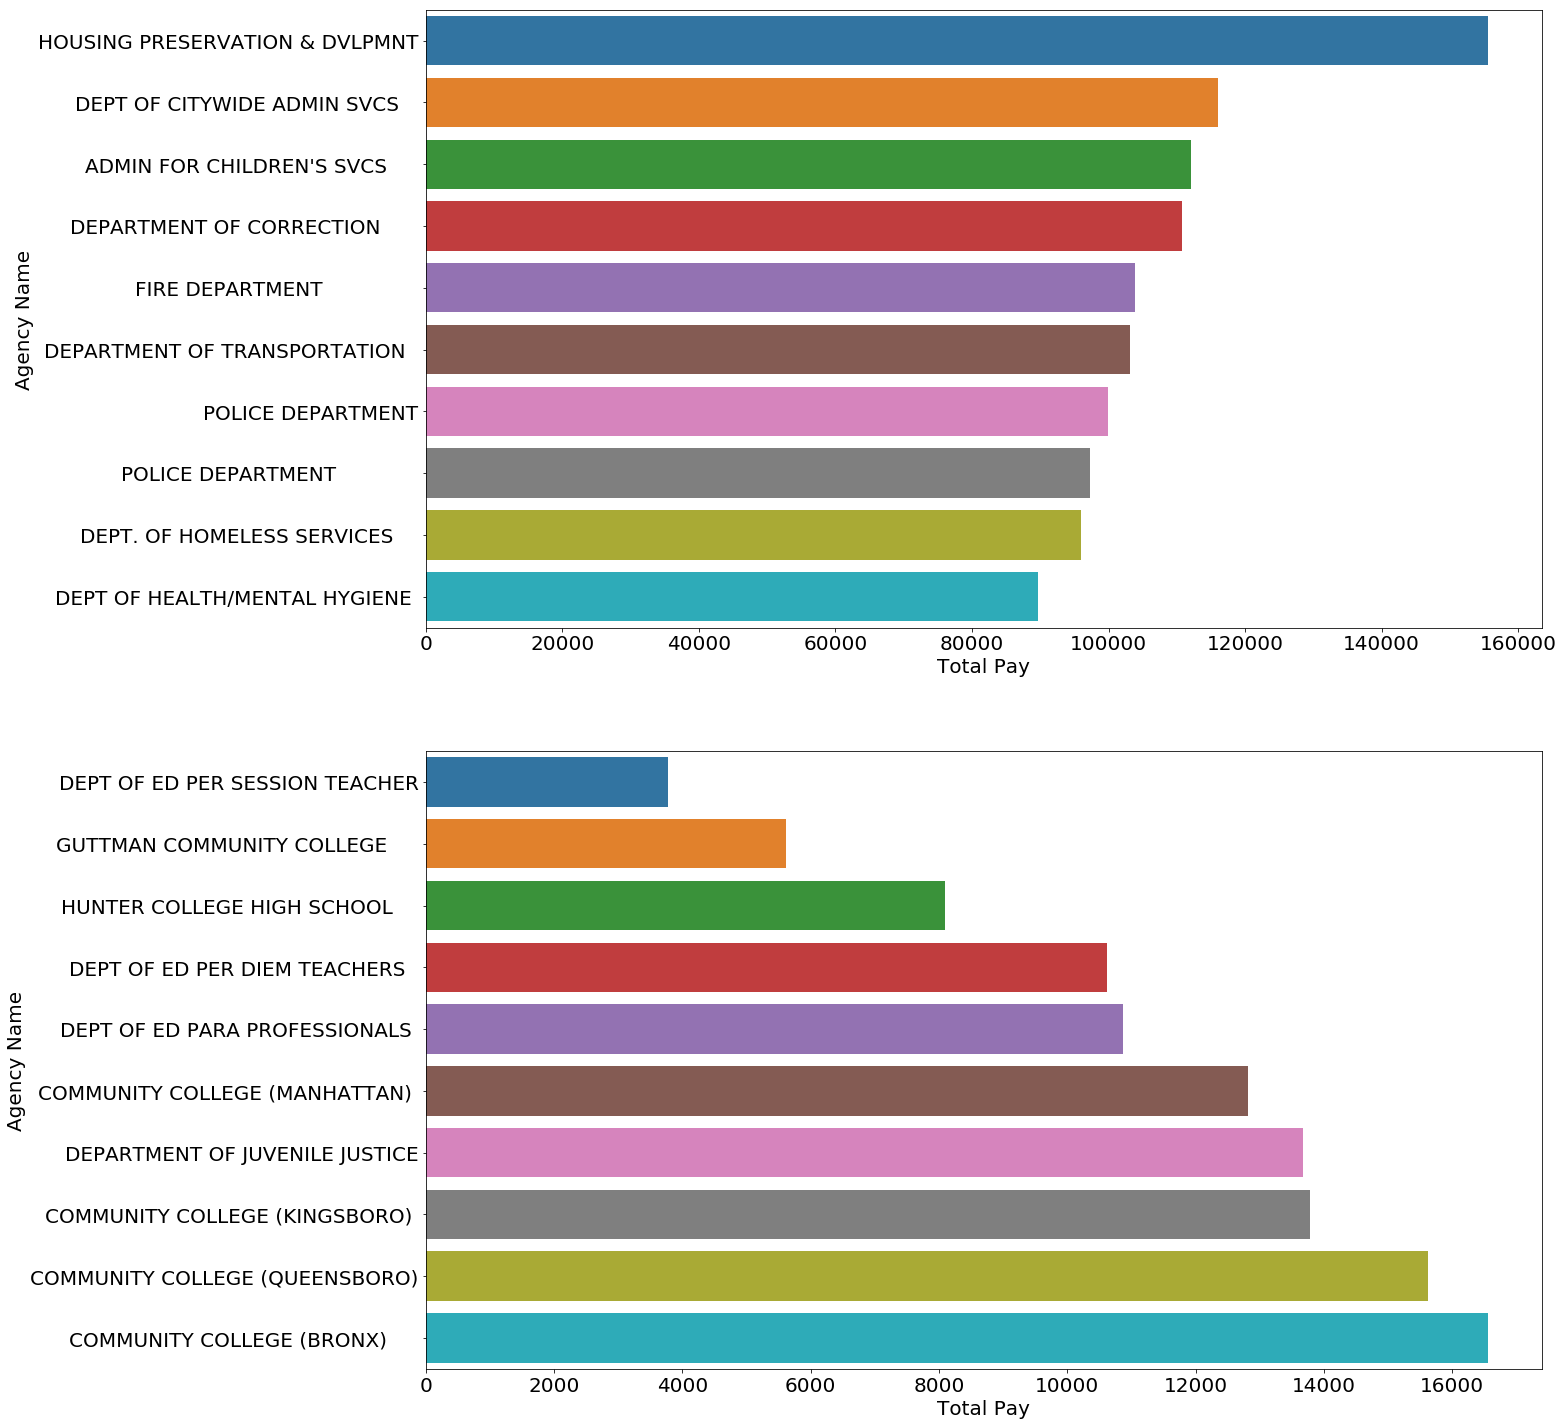

In [71]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Day')

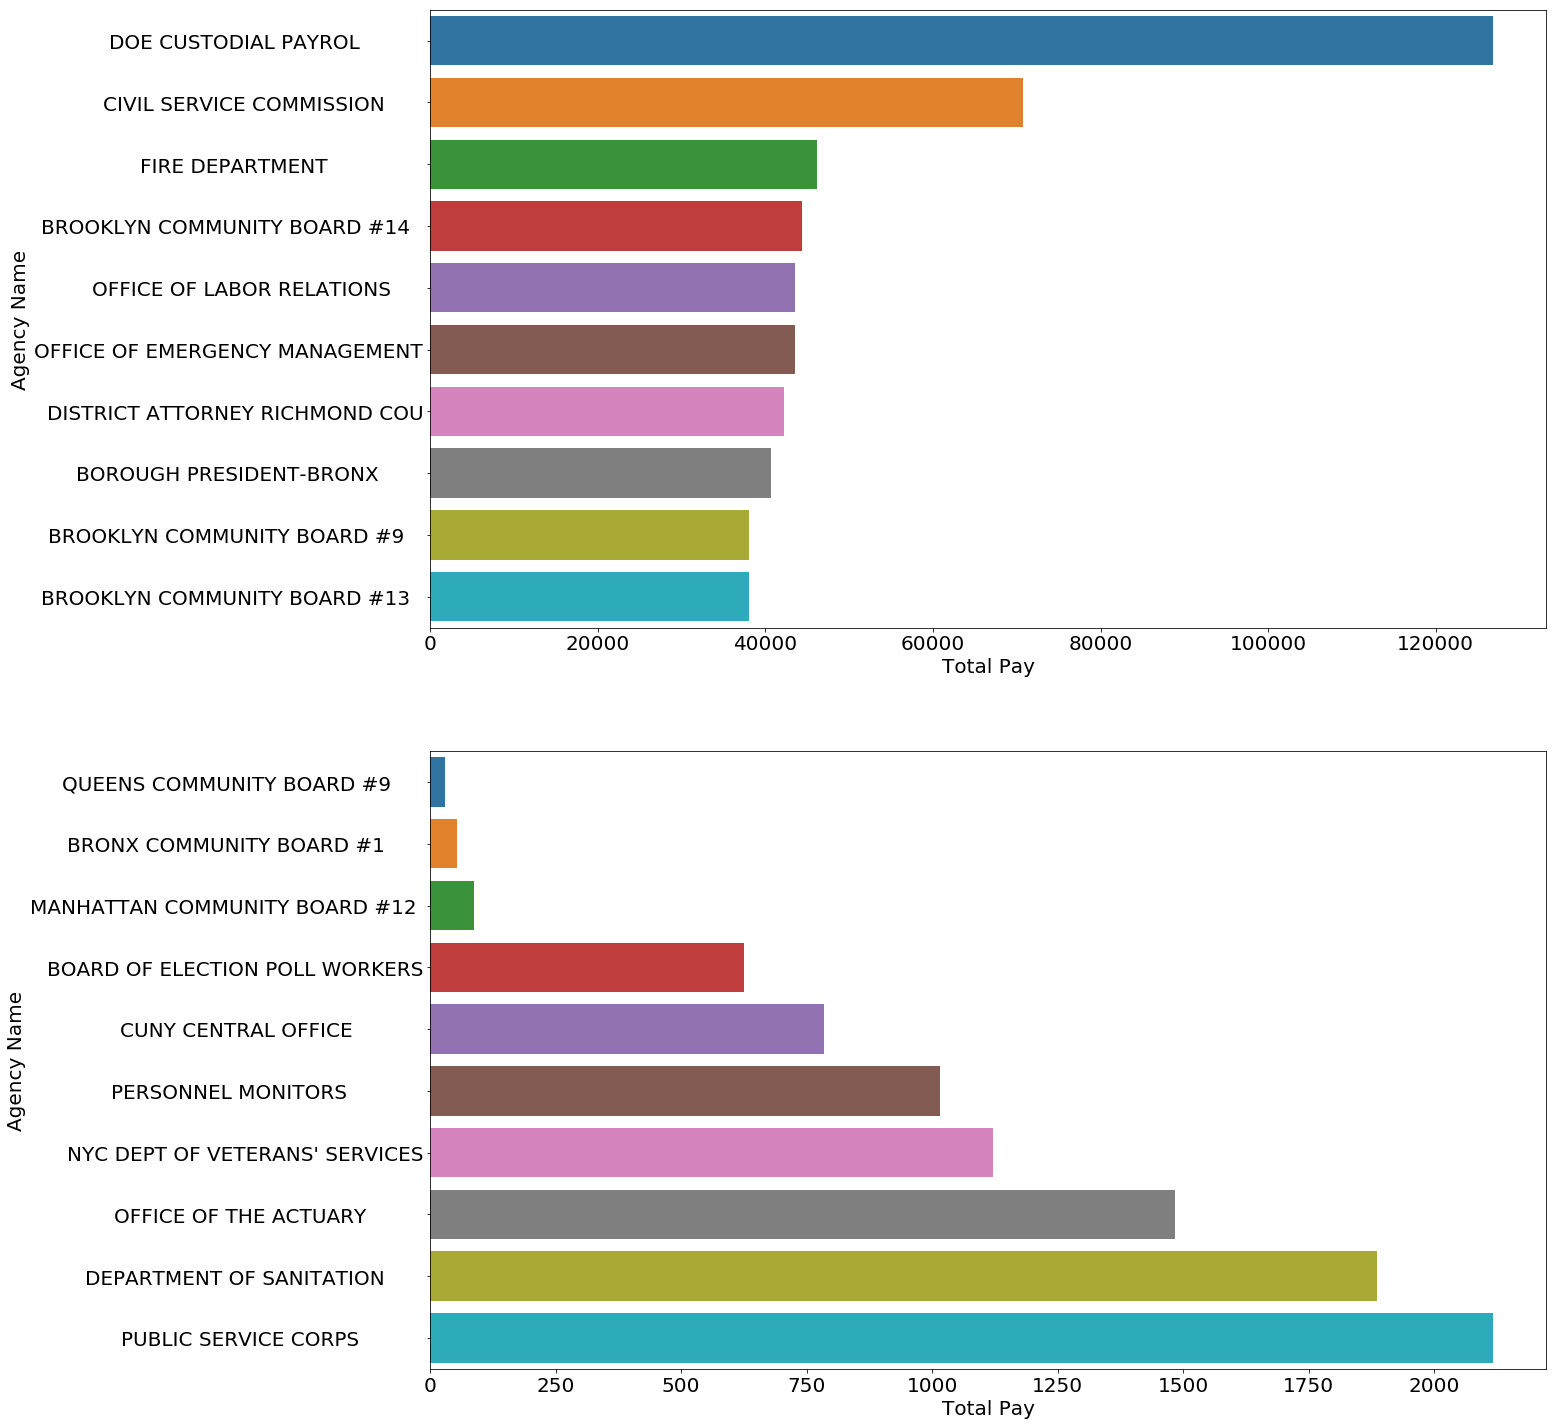

In [74]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Hour')

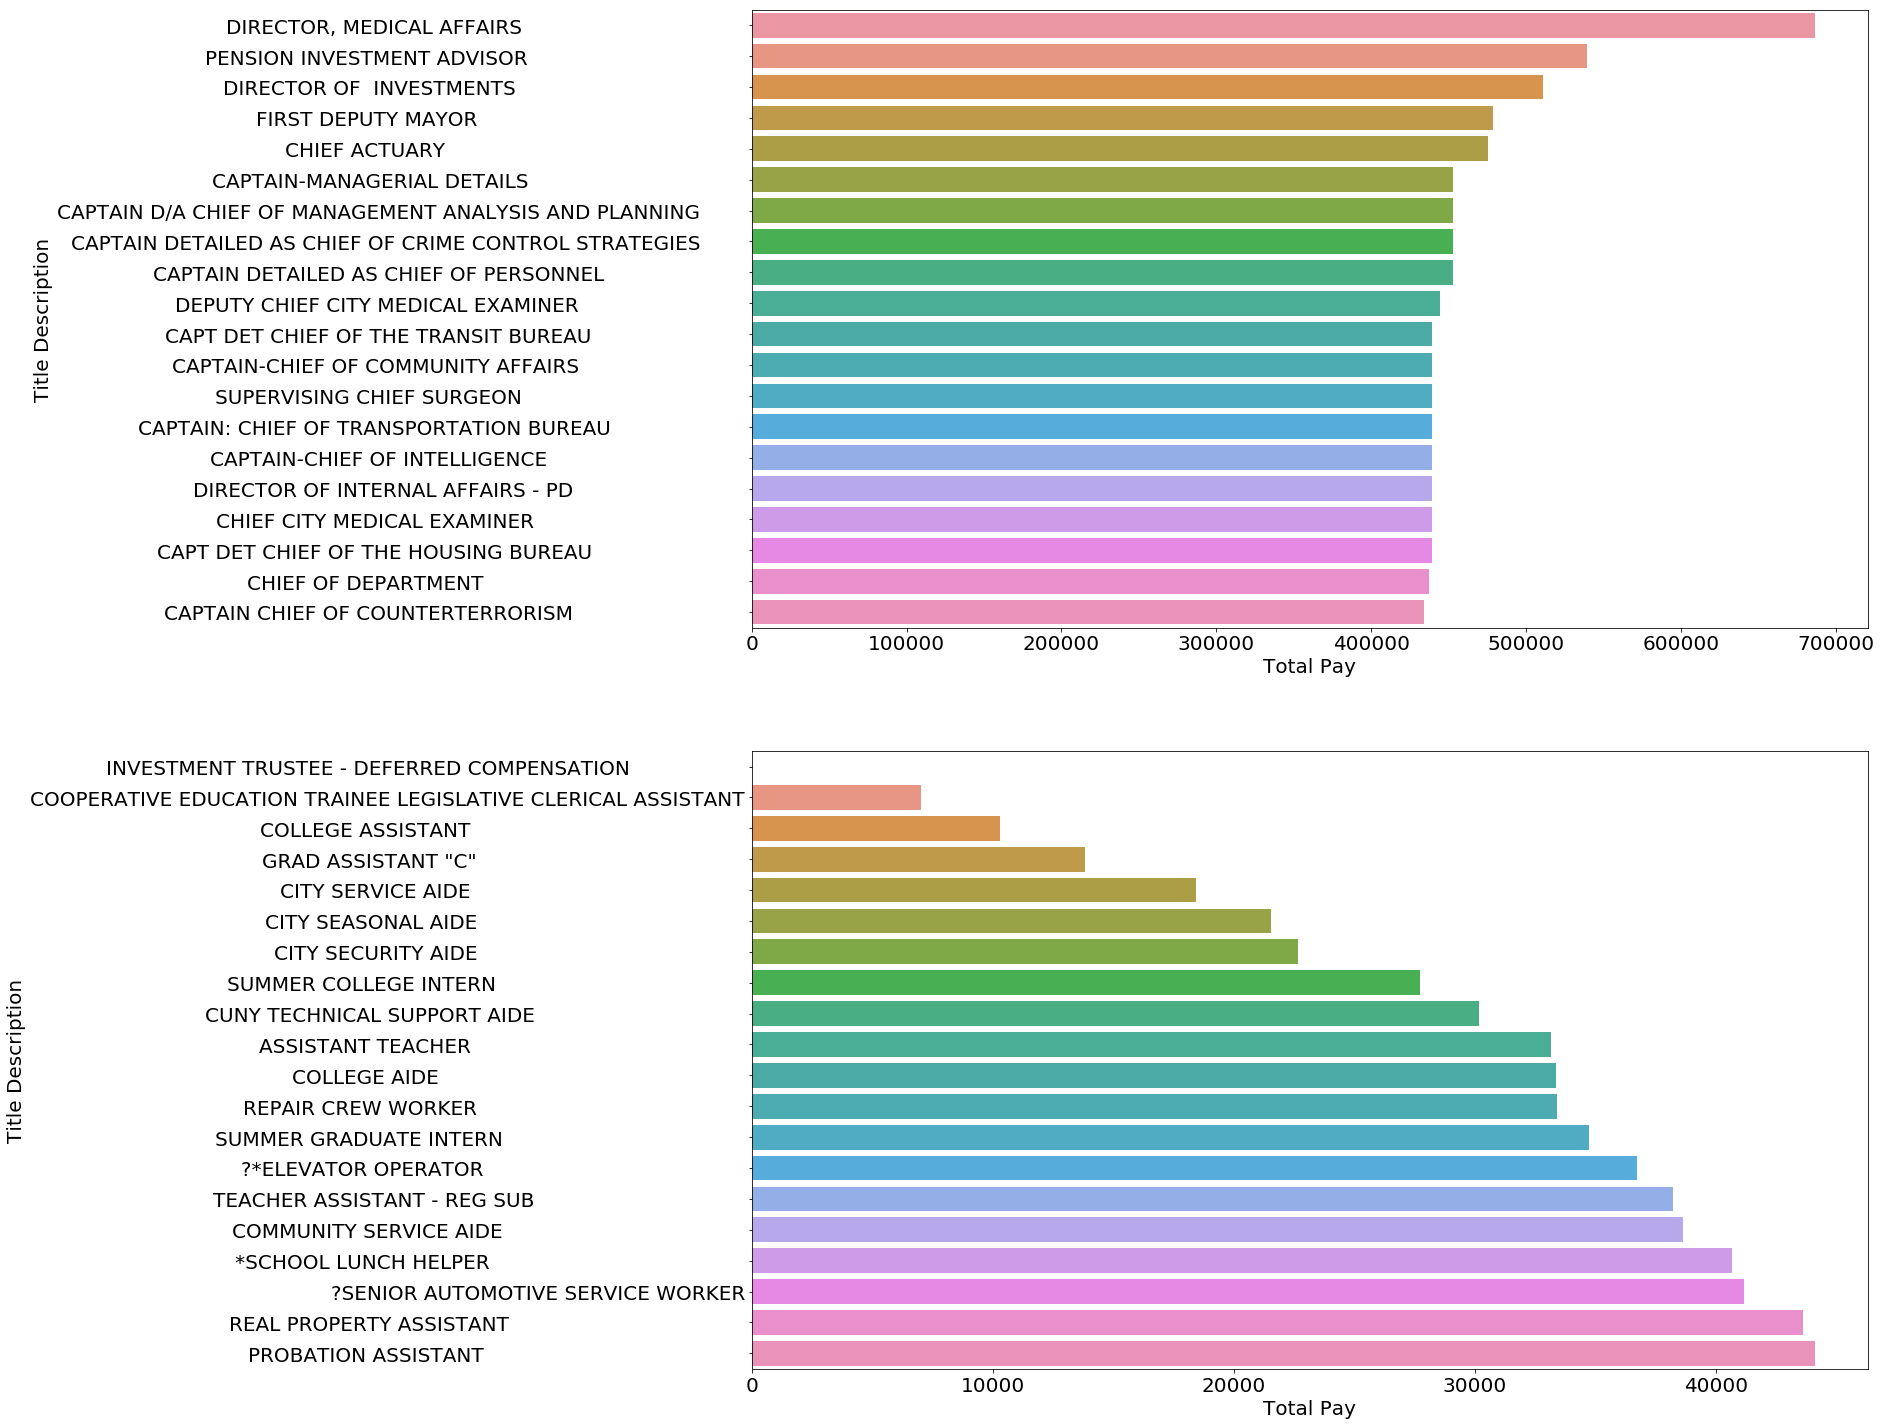

In [75]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Annum')

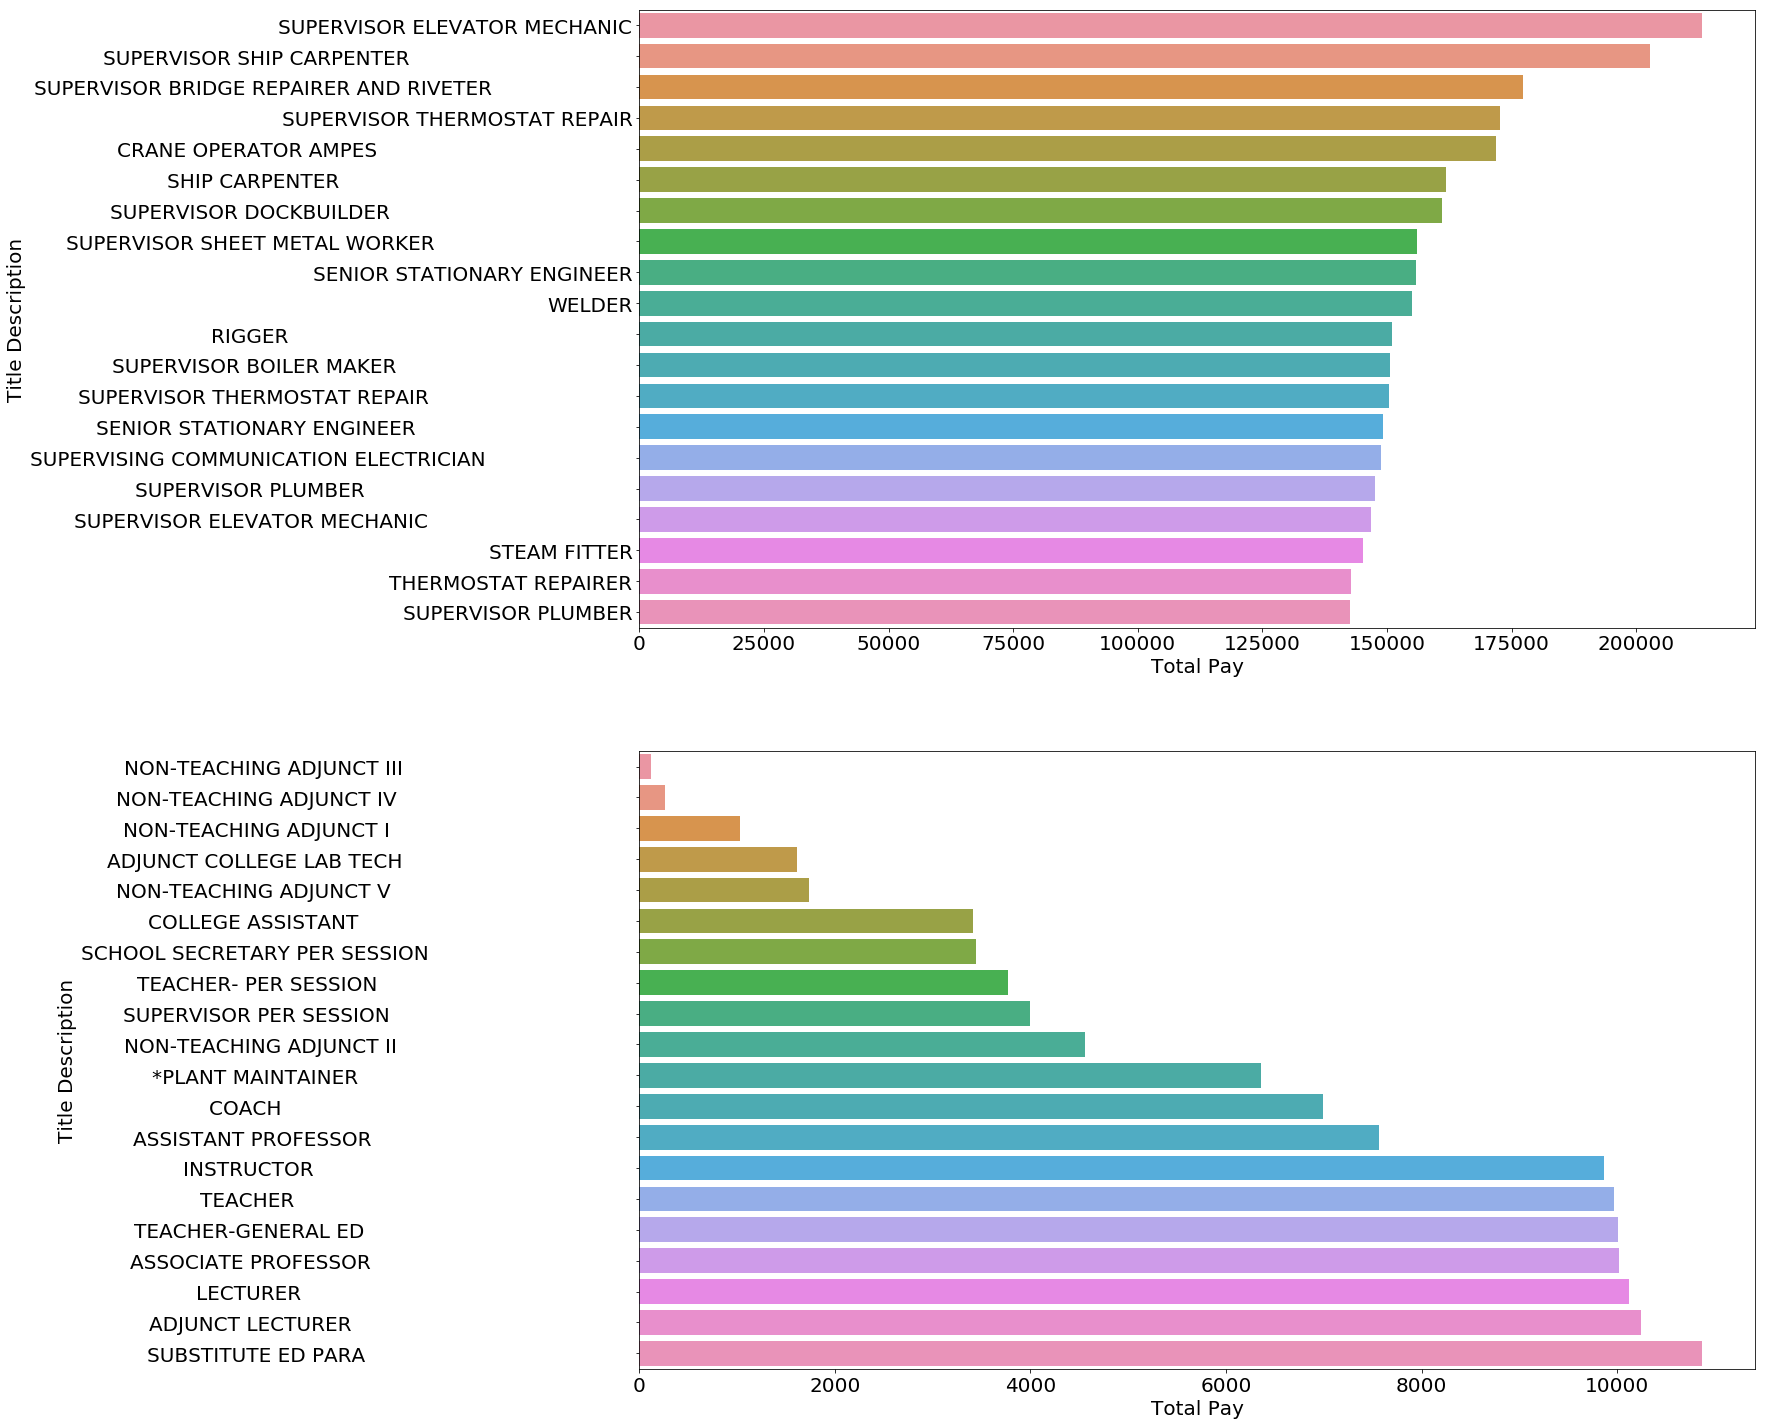

In [76]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Day')

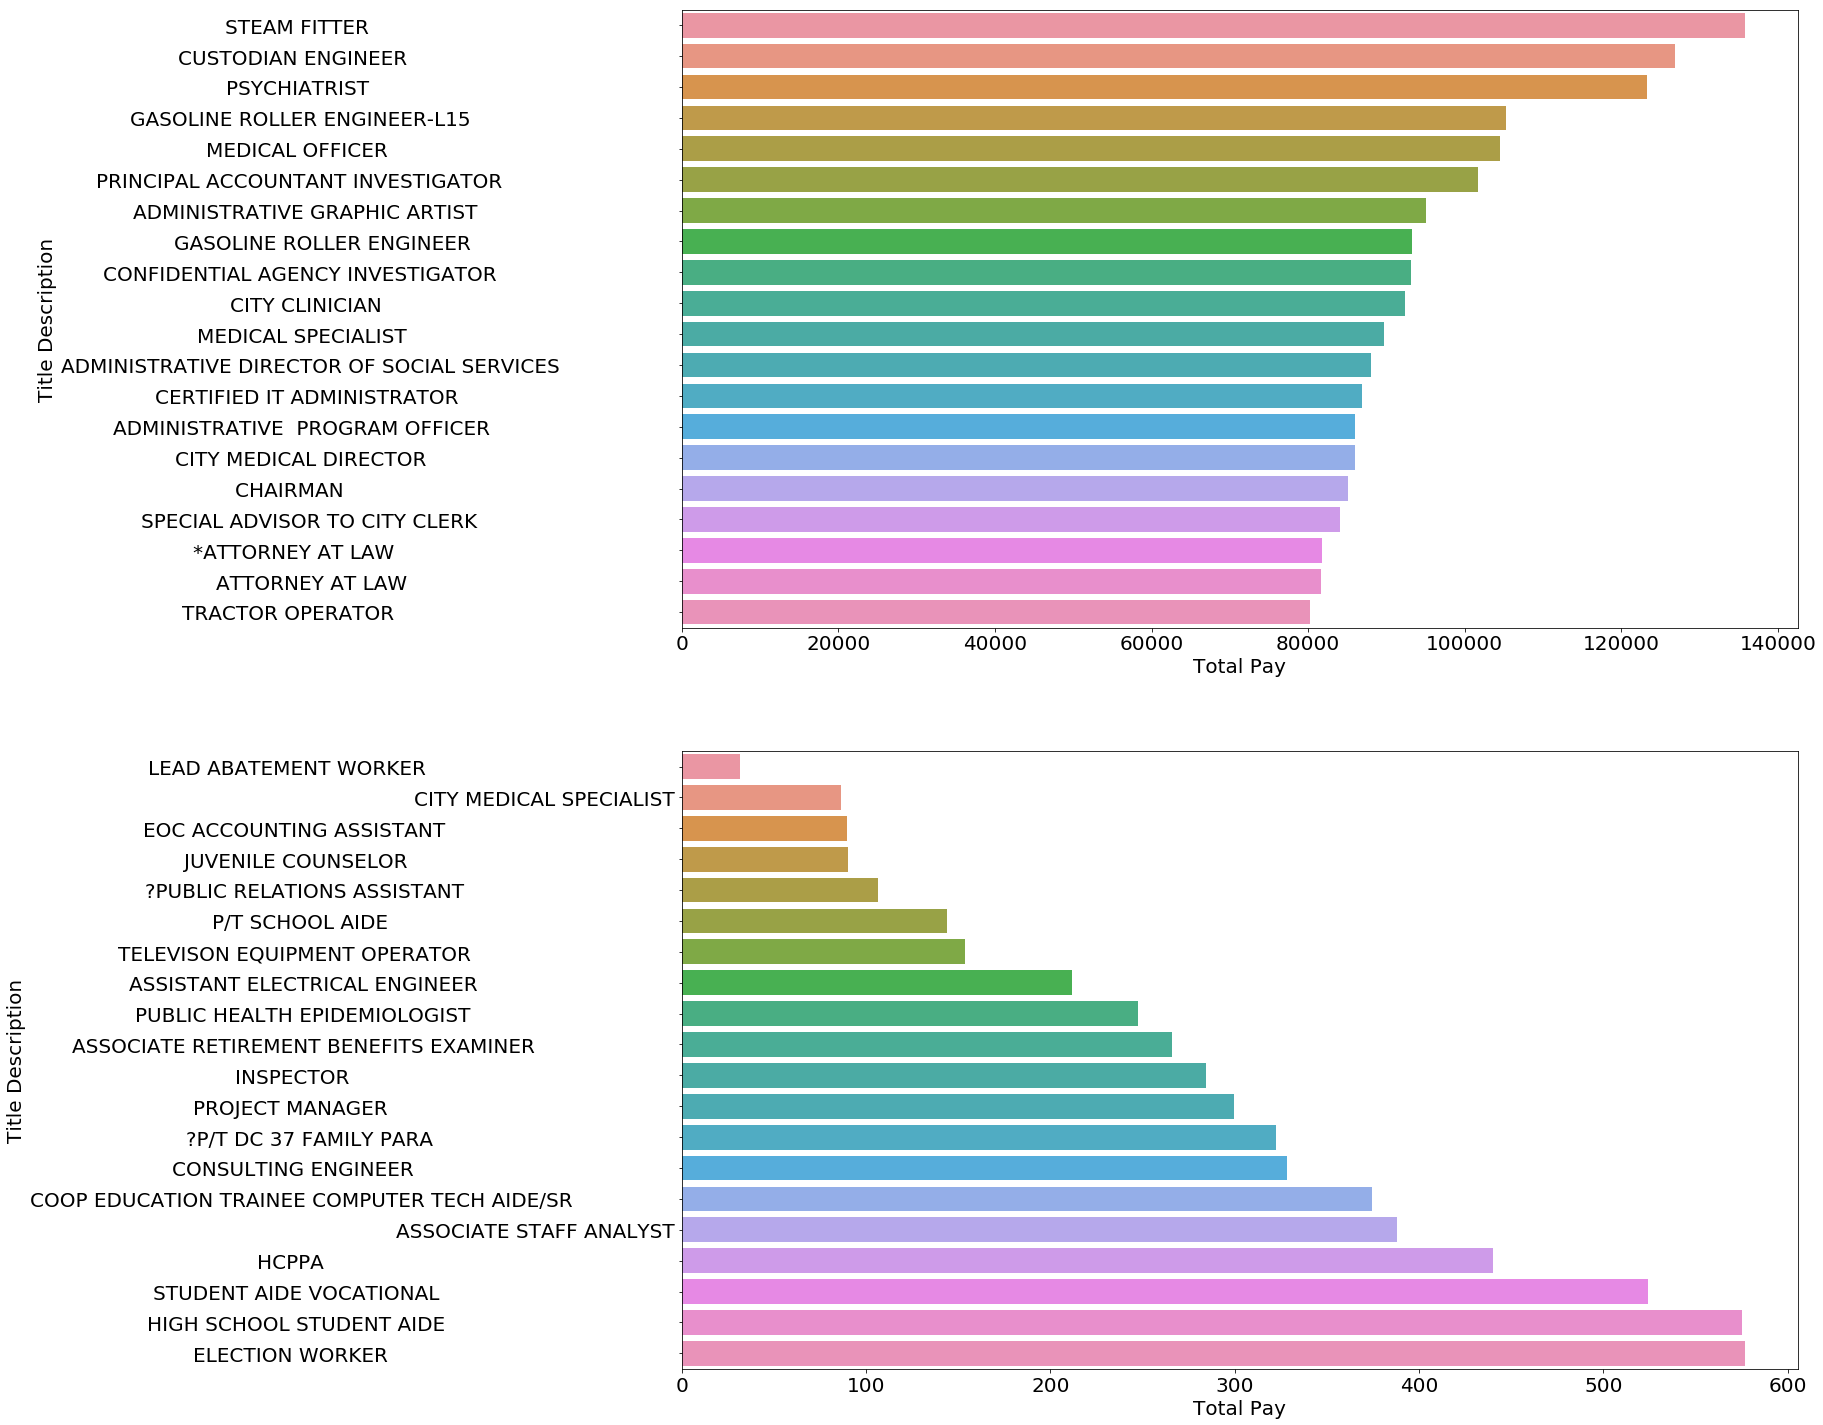

In [77]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Hour')

In [98]:
data['Work Location Borough'] = data['Work Location Borough'].str.strip().str.upper()
location_pay = data.groupby('Work Location Borough')['Total Pay'].mean().reset_index().sort_values('Total Pay',ascending=False)

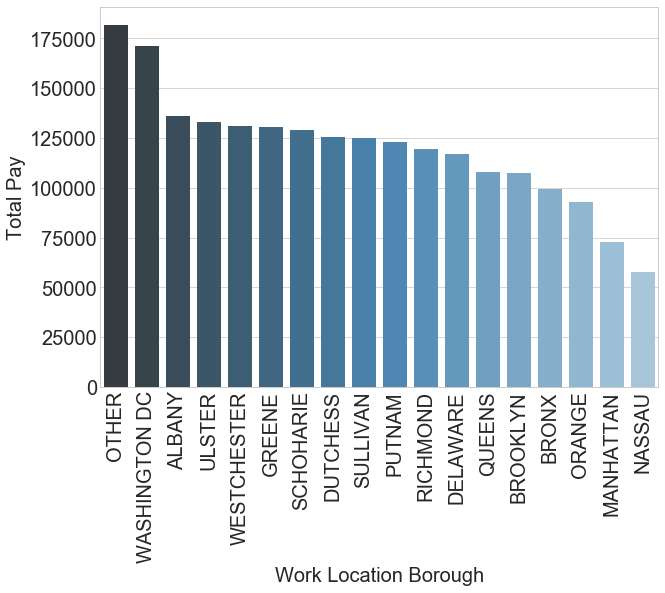

In [103]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.barplot(x=location_pay['Work Location Borough'], y=location_pay['Total Pay'],
           data=location_pay, palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

In [128]:
data['Agency Name'] = data['Agency Name'].str.strip().str.upper()
ot_ = data.groupby('Agency Name')['OT Hours'].mean().reset_index().sort_values('OT Hours',ascending=False)
ot_ = ot_.head(10)

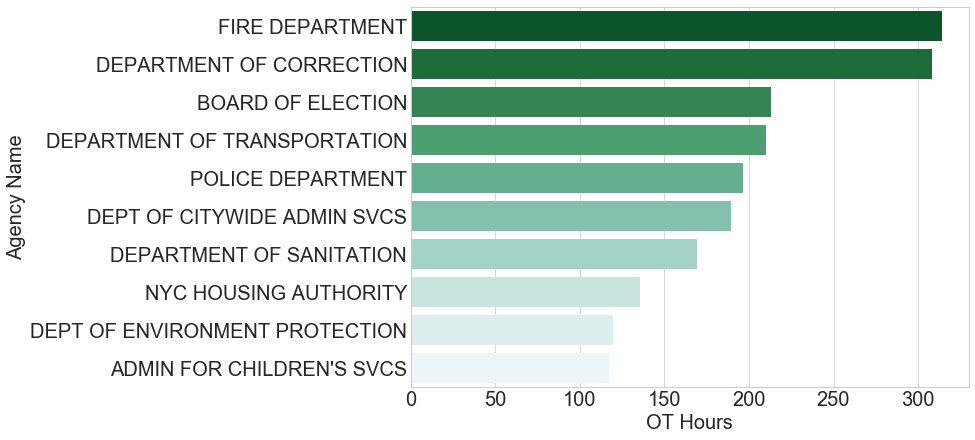

In [130]:
#sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.barplot(y=ot_['Agency Name'], x=ot_['OT Hours'],
           data=ot_, palette="BuGn_r", orient='h')
plt.show()

In [138]:
ot_pay = data.groupby('Fiscal Year')['Total OT Paid'].mean().reset_index()
ot_pay

,Fiscal Year,Total OT Paid
0,2014,3010.860226
1,2015,2942.610167
2,2016,3453.195422
3,2017,3489.337351
